In [1]:
library(tidyverse)

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
users <- read_csv('users.csv')
dutchpay_claim <- read_csv('dutchpay_claim.csv')
dutchpay_claim_detail <- read_csv('dutchpay_claim_detail.csv')
# a_payment_trx <- read_csv('a_payment_trx.csv')

Parsed with column specification:
cols(
  user_id = col_character(),
  gender_cd = col_double(),
  age = col_double(),
  foreigner_yn = col_character(),
  os_type = col_character()
)

Parsed with column specification:
cols(
  claim_id = col_double(),
  claim_at = col_datetime(format = ""),
  claim_user_id = col_character()
)

Parsed with column specification:
cols(
  claim_detail_id = col_double(),
  claim_id = col_double(),
  recv_user_id = col_character(),
  claim_amount = col_double(),
  send_amount = col_double(),
  status = col_character()
)



In [6]:
glimpse(users)
glimpse(dutchpay_claim)
glimpse(dutchpay_claim_detail)
# glimpse(a_payment_trx)

Rows: 123,924
Columns: 5
$ user_id      <chr> "01509a0865440e0", "7d4697fbadb1c09", "7b2a7724faf1400"…
$ gender_cd    <dbl> 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1…
$ age          <dbl> 32, 27, 26, 25, 31, 29, 37, 36, 28, 30, 32, 32, 40, 24,…
$ foreigner_yn <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", …
$ os_type      <chr> "A", "A", "A", "B", "A", "A", "A", "A", "A", "A", "A", …
Rows: 159,194
Columns: 3
$ claim_id      <dbl> 4420721, 4420704, 4454342, 4453683, 4348820, 4209764, …
$ claim_at      <dttm> 2020-02-07 15:29:18, 2020-02-07 15:26:54, 2020-02-10 …
$ claim_user_id <chr> "5cbd74112c55a0a", "5cbd74112c55a0a", "f077bc4ec8fd0ef…
Rows: 557,644
Columns: 6
$ claim_detail_id <dbl> 12918735, 12918734, 12829743, 12829742, 12829741, 12…
$ claim_id        <dbl> 4075714, 4075714, 4049182, 4049182, 4049182, 4049182…
$ recv_user_id    <chr> "39476d42bd5f268", "a84a2bf8ab324d3", "810b763a8f463…
$ claim_amount    <dbl> 4, 4, 11750, 11750, 11750, 11750, 9500, 950

1) '더치페이 요청에 대한 응답률이 높을수록 더치페이 서비스를 더 많이 사용한다'라는 가설을 통계적으로 검정하시오
> 해당 가설 검정 방법을 선택한 이유와 함께 전체 검정 과정을 기술하시오

In [7]:
dutchpay_claim_total <- left_join(dutchpay_claim, dutchpay_claim_detail, 
                                  by = 'claim_id')
glimpse(dutchpay_claim_total)

Rows: 557,784
Columns: 8
$ claim_id        <dbl> 4420721, 4420721, 4420721, 4420721, 4420704, 4420704…
$ claim_at        <dttm> 2020-02-07 15:29:18, 2020-02-07 15:29:18, 2020-02-0…
$ claim_user_id   <chr> "5cbd74112c55a0a", "5cbd74112c55a0a", "5cbd74112c55a…
$ claim_detail_id <dbl> 14115935, 14115933, 14115932, 14115934, 14115887, 14…
$ recv_user_id    <chr> "e97b2a81b8cc38e", "b76fb84848485e9", "5cbd74112c55a…
$ claim_amount    <dbl> 13000, 13000, 13000, 13000, 13166, 13166, 13166, 131…
$ send_amount     <dbl> NA, NA, 13000, 13000, NA, NA, 13166, NA, NA, NA, 128…
$ status          <chr> "CLAIM", "CLAIM", "CHECK", "SEND", "CLAIM", "CLAIM",…


In [10]:
users_dutchpay_claim_total <- left_join(dutchpay_claim_total, users,  
                                        by = c('claim_user_id' = 'user_id'))
glimpse(users_dutchpay_claim_total)

Rows: 557,784
Columns: 12
$ claim_id        <dbl> 4420721, 4420721, 4420721, 4420721, 4420704, 4420704…
$ claim_at        <dttm> 2020-02-07 15:29:18, 2020-02-07 15:29:18, 2020-02-0…
$ claim_user_id   <chr> "5cbd74112c55a0a", "5cbd74112c55a0a", "5cbd74112c55a…
$ claim_detail_id <dbl> 14115935, 14115933, 14115932, 14115934, 14115887, 14…
$ recv_user_id    <chr> "e97b2a81b8cc38e", "b76fb84848485e9", "5cbd74112c55a…
$ claim_amount    <dbl> 13000, 13000, 13000, 13000, 13166, 13166, 13166, 131…
$ send_amount     <dbl> NA, NA, 13000, 13000, NA, NA, 13166, NA, NA, NA, 128…
$ status          <chr> "CLAIM", "CLAIM", "CHECK", "SEND", "CLAIM", "CLAIM",…
$ gender_cd       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ age             <dbl> 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, …
$ foreigner_yn    <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N…
$ os_type         <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "B…


- 응답률의 정의 :

더치페이는 한 사람이 여러사람에게 요청한다. 요청받은 사람들 중 응답(송금SEND) 한 숫자가 많을수록 응답률이 높다고 할 수 있다.

> 응답률 : claim_id당 status의 CLAIM 갯수 대비 SEND 갯수 비율

- claim_id당 status의 CLAIM 갯수

In [13]:
users_dutchpay_claim_total %>% 
    group_by(claim_id) %>%
    filter(status == 'CLAIM') %>% 
    summarise(claim_n = n()) -> users_dutchpay_claim_count
glimpse(users_dutchpay_claim_count)

Rows: 125,737
Columns: 2
$ claim_id <dbl> 3710950, 3710972, 3710973, 3710977, 3710987, 3711012, 37110…
$ claim_n  <int> 2, 4, 4, 3, 2, 3, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2,…


- claim_id당 status의 SEND 갯수

In [22]:
users_dutchpay_claim_total %>% 
    group_by(claim_id) %>%
    filter(status == 'SEND') %>% 
    mutate(send_n = n()) -> users_dutchpay_send_count
glimpse(users_dutchpay_send_count)

Rows: 153,805
Columns: 13
Groups: claim_id [87,360]
$ claim_id        <dbl> 4420721, 4454342, 4454342, 4454342, 4454342, 4453683…
$ claim_at        <dttm> 2020-02-07 15:29:18, 2020-02-10 19:18:31, 2020-02-1…
$ claim_user_id   <chr> "5cbd74112c55a0a", "f077bc4ec8fd0ef", "f077bc4ec8fd0…
$ claim_detail_id <dbl> 14115934, 14234736, 14234735, 14234734, 14234733, 14…
$ recv_user_id    <chr> "c76d85ff6b23d31", "964cc5e24331673", "1f7c25076223d…
$ claim_amount    <dbl> 13000, 12800, 12800, 12800, 12800, 20000, 20000, 200…
$ send_amount     <dbl> 13000, 12800, 12800, 12800, 12800, 20000, 20000, 200…
$ status          <chr> "SEND", "SEND", "SEND", "SEND", "SEND", "SEND", "SEN…
$ gender_cd       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ age             <dbl> 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 21, …
$ foreigner_yn    <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N…
$ os_type         <chr> "A", "B", "B", "B", "B", "B", "B", "B", "B", "B", "B…
$ send_n    

In [23]:
users_dutchpay_claim_send <- left_join(users_dutchpay_claim_count, users_dutchpay_send_count)
glimpse(users_dutchpay_claim_send)

Joining, by = "claim_id"



Rows: 169,005
Columns: 14
$ claim_id        <dbl> 3710950, 3710972, 3710973, 3710977, 3710987, 3711012…
$ claim_n         <int> 2, 4, 4, 3, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1…
$ claim_at        <dttm> NA, NA, NA, NA, NA, 2019-12-01 00:07:44, NA, 2019-1…
$ claim_user_id   <chr> NA, NA, NA, NA, NA, "fc475584f568eb5", NA, "1dee7537…
$ claim_detail_id <dbl> NA, NA, NA, NA, NA, 11640399, NA, 11640447, 11640446…
$ recv_user_id    <chr> NA, NA, NA, NA, NA, "49e35c4ede65249", NA, "ecf74635…
$ claim_amount    <dbl> NA, NA, NA, NA, NA, 5260, NA, 6250, 6250, 52000, 520…
$ send_amount     <dbl> NA, NA, NA, NA, NA, 5260, NA, 6250, 6250, 52000, 520…
$ status          <chr> NA, NA, NA, NA, NA, "SEND", NA, "SEND", "SEND", "SEN…
$ gender_cd       <dbl> NA, NA, NA, NA, NA, 2, NA, 2, 2, 2, 2, 2, NA, NA, NA…
$ age             <dbl> NA, NA, NA, NA, NA, 34, NA, 26, 26, 31, 31, 22, NA, …
$ foreigner_yn    <chr> NA, NA, NA, NA, NA, "N", NA, "N", "N", "N", "N", "N"…
$ os_type         <chr> NA, NA, NA, NA

In [24]:
users_dutchpay_claim_send$send_n <- replace(users_dutchpay_claim_send$send_n, 
                                            is.na(users_dutchpay_claim_send$send_n),
                                            0)
users_dutchpay_claim_send %>% 
    select(claim_id, claim_n, send_n) %>%
    mutate(response = send_n / claim_n) -> users_dutchpay_response

Rows: 169,005
Columns: 4
$ claim_id <dbl> 3710950, 3710972, 3710973, 3710977, 3710987, 3711012, 37110…
$ claim_n  <int> 2, 4, 4, 3, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1,…
$ send_n   <dbl> 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2,…
$ response <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.33…


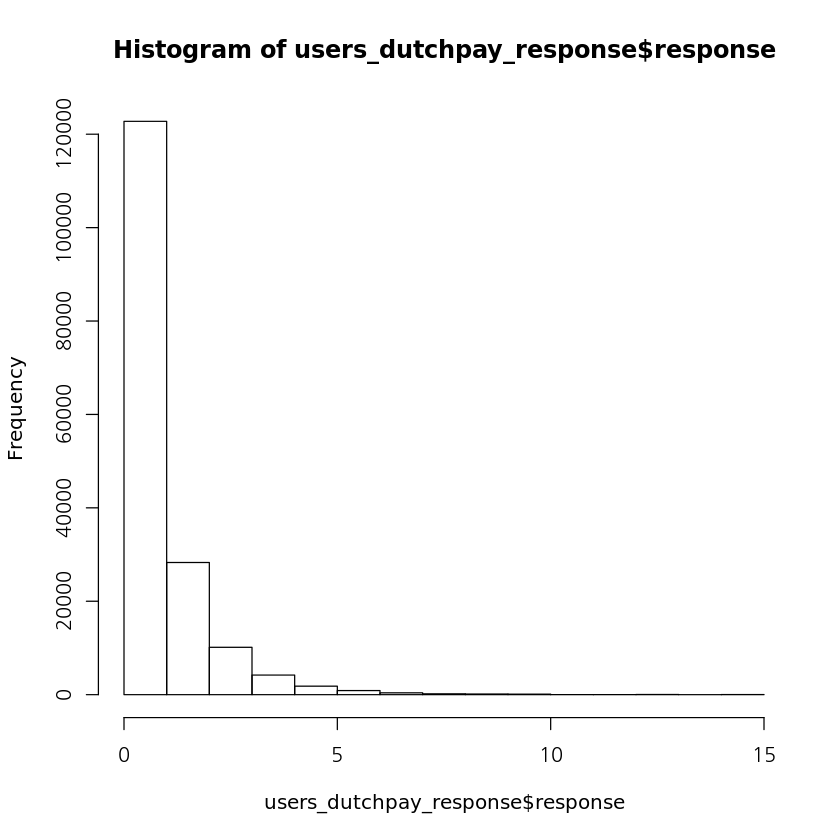

In [25]:
glimpse(users_dutchpay_response)
hist(users_dutchpay_response$response)

- 더치페이 서비스 사용량의 정의 :

"더치페이 요청에 대한 응답률이 높을수록 더치페이 서비스를 **'더 많이 사용'**한다."는 가설 문장의 맥락을 파악하면 '응답이 많을수록 **요청**기능을 을 더 많이 실행한다'라고 해석할 수 있다. 여기서의 '사용'은 요청(CLAIM)을 의미한다.
> 사용량 : claim_id당 status의 CLAIM 갯수

In [26]:
length(users_dutchpay_claim_total$claim_id)
length(unique(users_dutchpay_claim_total$claim_id))

[1] 557784

[1] 159194

In [30]:
users_dutchpay_response %>% 
    group_by(claim_id) %>%
    summarize(claim_no = n()) -> users_dutchpay_usage

In [31]:
claim_response_usage <- left_join(users_dutchpay_usage, 
                                  users_dutchpay_response,
                                  by = 'claim_id')
glimpse(claim_response_usage)
summary(claim_response_usage)

Rows: 169,005
Columns: 5
$ claim_id <dbl> 3710950, 3710972, 3710973, 3710977, 3710987, 3711012, 37110…
$ claim_no <int> 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,…
$ claim_n  <int> 2, 4, 4, 3, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1,…
$ send_n   <dbl> 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2,…
$ response <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.33…


    claim_id          claim_no     claim_n           send_n      
 Min.   :3710950   Min.   : 1   Min.   : 1.000   Min.   : 0.000  
 1st Qu.:3951767   1st Qu.: 1   1st Qu.: 1.000   1st Qu.: 0.000  
 Median :4201381   Median : 1   Median : 2.000   Median : 1.000  
 Mean   :4201192   Mean   : 2   Mean   : 2.182   Mean   : 1.594  
 3rd Qu.:4449283   3rd Qu.: 2   3rd Qu.: 3.000   3rd Qu.: 2.000  
 Max.   :4693812   Max.   :35   Max.   :44.000   Max.   :35.000  
    response      
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.5000  
 Mean   : 0.9469  
 3rd Qu.: 1.5000  
 Max.   :15.0000  

- 상관분석

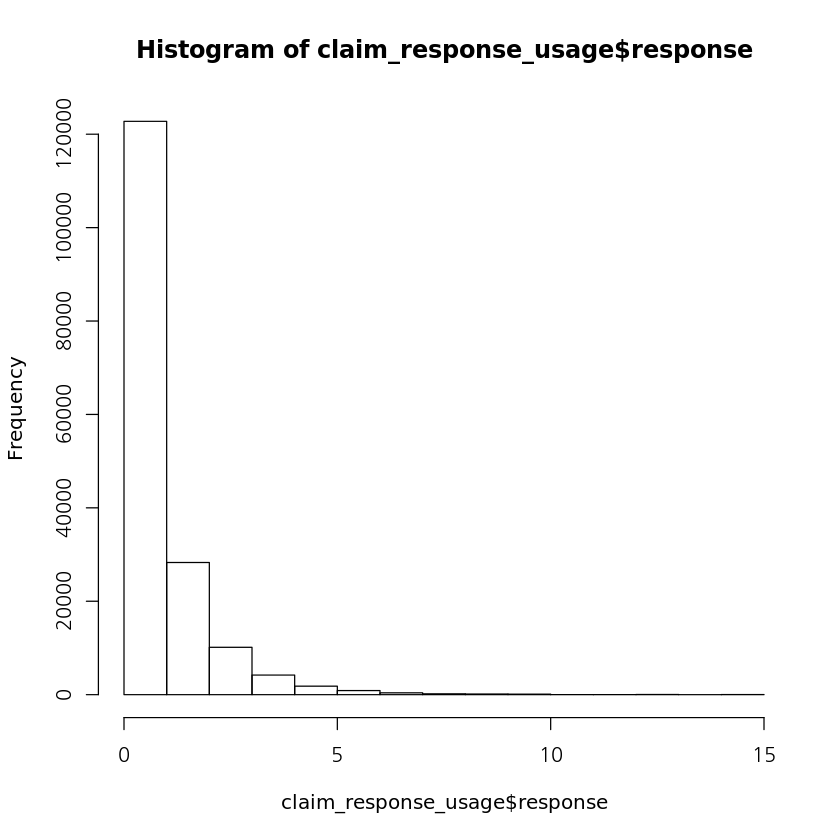

In [39]:
hist(claim_response_usage$response)

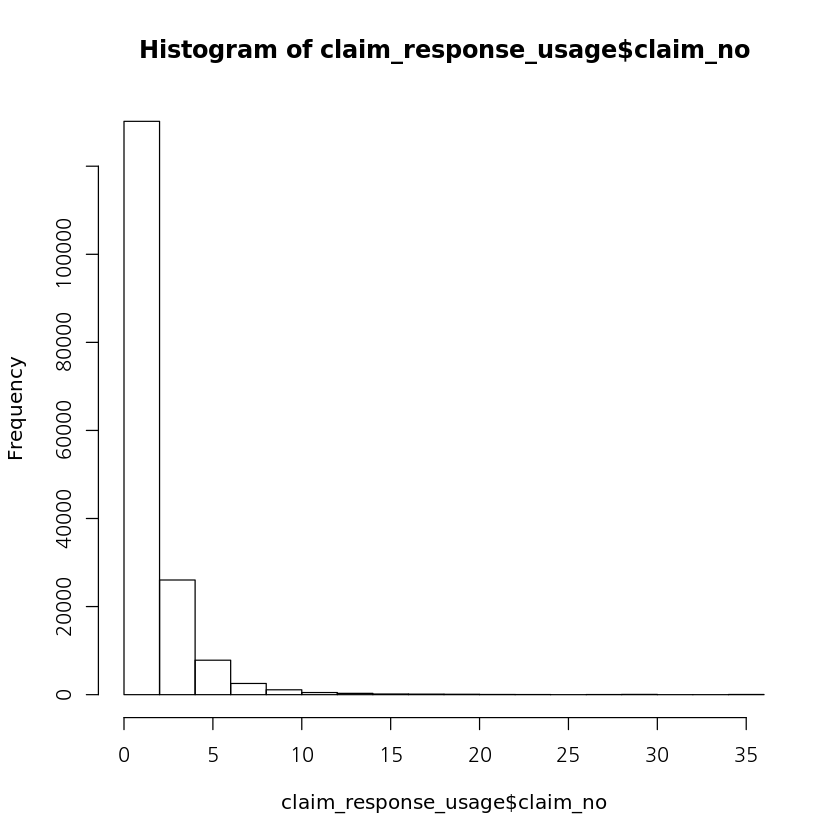

In [40]:
hist(claim_response_usage$claim_no)

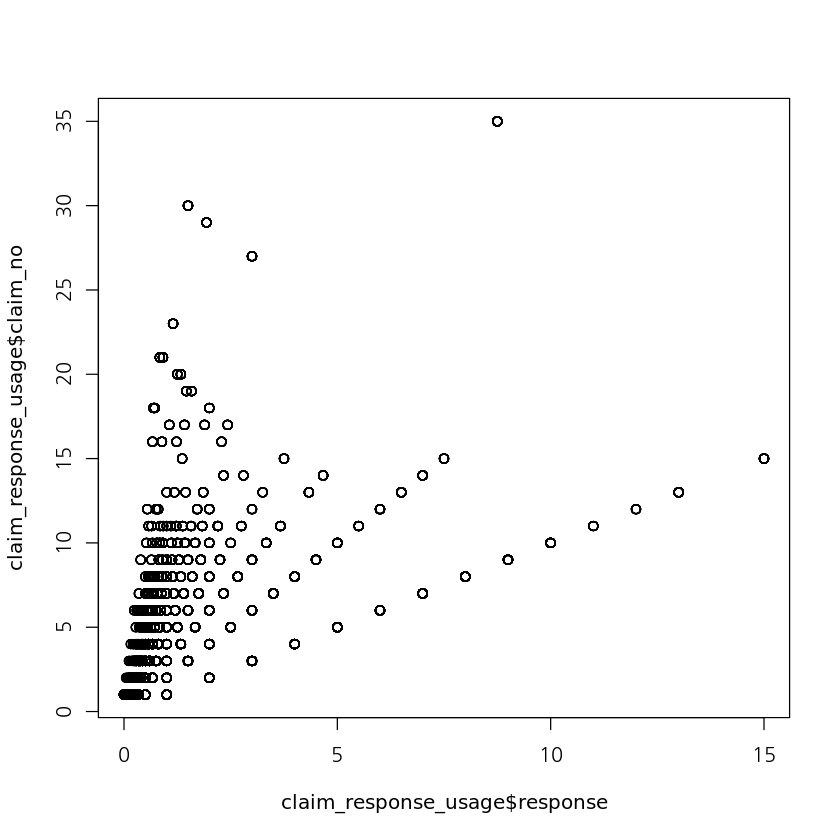

In [32]:
plot(claim_response_usage$response, claim_response_usage$claim_no)

연속형 변수이므로 피어슨 상관계수를 선택하여 두 변수간의 선형적 상관관계를 검증한다.

In [42]:
cor.test(claim_response_usage$response, claim_response_usage$claim_no, 
         alternative=c('greater'), method = 'pearson')


	Pearson's product-moment correlation

data:  claim_response_usage$response and claim_response_usage$claim_no
t = 320.77, df = 169003, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.612676 1.000000
sample estimates:
     cor 
0.615169 


p-value < 2.2e-16으로 양의 상관관계가 매우 유의하다.

In [43]:
cor(claim_response_usage$response, claim_response_usage$claim_no, method = 'pearson')

[1] 0.615169

상관계수는 0.615로 아주 강한 양의 상관관계를 보인다.

> '더치페이 요청에 대한 응답률이 높을수록 더치페이 서비스를 더 많이 사용한다'는 가설이 통계적으로 유의미하게 검증되었다.